In [16]:
import pandas as pd

In [17]:
# Load Dataset
data = pd.read_csv('/content/nlp_dataset.csv')

PREPROCESSING

In [18]:
# View Dataset
data.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [19]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [20]:
# Check datatype
data['Comment'].dtype


dtype('O')

In [21]:
# check missing value
data['Comment'].isnull().sum()

np.int64(0)

In [22]:
# Check whether all text is in lowercase

data['Comment'].str.islower().all()

np.True_

In [23]:
# Remove HTML tags

data['Comment'] = data['Comment'].str.replace(r'<.*?>','',regex=True)

# Remove emoji
data['Comment'] = data['Comment'].apply(lambda x:x.encode('ascii','ignore').decode('ascii'))

# Remove numbers
data['Comment'] = data['Comment'].replace(r'\d+','',regex=True)

# Remove special characters
data['Comment'] = data['Comment'].replace(r'[^a-zA-Z\s]','',regex=True)

# Remove extra spaces
data['Comment'] = data['Comment'].replace(r'\s+',' ',regex=True).str.strip()



In [24]:
# Tokenization
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize                 # Word Tokenization splits text into individual words
data['Token'] = data['Comment'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
# View dataset
data.head()

,Comment,Emotion,Token
0,i seriously hate one subject to death but now ...,fear,"[i, seriously, hate, one, subject, to, death, ..."
1,im so full of life i feel appalled,anger,"[im, so, full, of, life, i, feel, appalled]"
2,i sit here to write i start to dig out my feel...,fear,"[i, sit, here, to, write, i, start, to, dig, o..."
3,ive been really angry with r and i feel like a...,joy,"[ive, been, really, angry, with, r, and, i, fe..."
4,i feel suspicious if there is no one outside l...,fear,"[i, feel, suspicious, if, there, is, no, one, ..."


In [26]:
# Removing stopwords
from nltk.corpus import stopwords            # Removes common words
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

data['Token'] = data['Token'].apply(lambda x: [word for word in x if word not in stop_words])
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Comment,Emotion,Token
0,i seriously hate one subject to death but now ...,fear,"[seriously, hate, one, subject, death, feel, r..."
1,im so full of life i feel appalled,anger,"[im, full, life, feel, appalled]"
2,i sit here to write i start to dig out my feel...,fear,"[sit, write, start, dig, feelings, think, afra..."
3,ive been really angry with r and i feel like a...,joy,"[ive, really, angry, r, feel, like, idiot, tru..."
4,i feel suspicious if there is no one outside l...,fear,"[feel, suspicious, one, outside, like, rapture..."


In [27]:
# Lemmatization
from nltk.stem import WordNetLemmatizer            # Lemmatization reduces words to their base form
nltk.download('wordnet')

Lemmatizer = WordNetLemmatizer()
data['Token'] = data['Token'].apply(lambda x: [Lemmatizer.lemmatize(word) for word in x])
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Comment,Emotion,Token
0,i seriously hate one subject to death but now ...,fear,"[seriously, hate, one, subject, death, feel, r..."
1,im so full of life i feel appalled,anger,"[im, full, life, feel, appalled]"
2,i sit here to write i start to dig out my feel...,fear,"[sit, write, start, dig, feeling, think, afrai..."
3,ive been really angry with r and i feel like a...,joy,"[ive, really, angry, r, feel, like, idiot, tru..."
4,i feel suspicious if there is no one outside l...,fear,"[feel, suspicious, one, outside, like, rapture..."


FEATURE EXTRACTION

In [28]:
# convert tokens backs to strings (since TF-IDF works on strings)
data['Cleaned_Comment'] = data['Token'].apply(lambda x: ' '.join(x))
data[['Cleaned_Comment']].head()

,Cleaned_Comment
0,seriously hate one subject death feel reluctan...
1,im full life feel appalled
2,sit write start dig feeling think afraid accep...
3,ive really angry r feel like idiot trusting fi...
4,feel suspicious one outside like rapture happe...


In [50]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(data['Cleaned_Comment'])
y = data['Emotion']

print(X.shape)

(5937, 7972)


TF-IDF Vectorizer was used to convert text into numerical features. It assigns higher weight to important words and lower weight to common words, making the text suitable for machine learning models.

MODEL DEVELOPMENT

In [30]:
# Train-Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(4749, 7972)
(1188, 7972)


In [31]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [32]:
# Support Vector Machine
from sklearn.svm import LinearSVC
svm_model = LinearSVC()

svm_model.fit(X_train, y_train)


LinearSVC()

Model evaluation and comparison

In [40]:
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [41]:
y_pred_nb = nb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

In [43]:
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Naive Bayes F1-Score:', f1_score(y_test, y_pred_nb, average='weighted'))
print('\nNaive Bayes Classification Report\n', classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9090909090909091
Naive Bayes F1-Score: 0.909077131738324

Naive Bayes Classification Report
               precision    recall  f1-score   support

       anger       0.89      0.93      0.91       392
        fear       0.92      0.92      0.92       416
         joy       0.93      0.88      0.90       380

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188



In [44]:
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('SVM F1-Score:', f1_score(y_test, y_pred_svm, average='weighted'))
print('\nSVM Classification Report\n', classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9419191919191919
SVM F1-Score: 0.9418640947042499

SVM Classification Report
               precision    recall  f1-score   support

       anger       0.93      0.95      0.94       392
        fear       0.96      0.92      0.94       416
         joy       0.94      0.96      0.95       380

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



SVM is better model than Naive Bayes

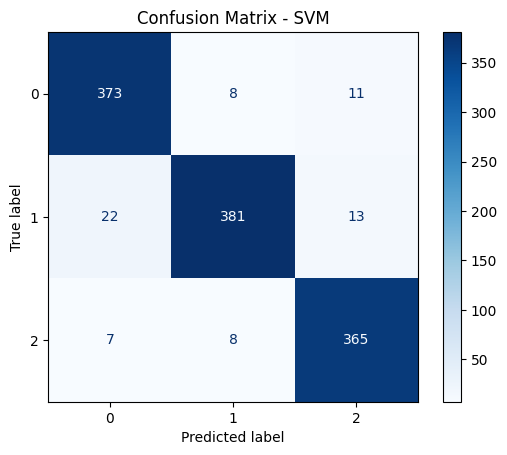

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


The model is very accurate. Most misclassifications occurred between anger and fear.

In [49]:
comparison_table = pd.DataFrame({
    'Model': ['Naive Bayes', 'Support Vector Machine'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_svm)],
    'F1-Score': [
        f1_score(y_test, y_pred_nb, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted')
    ]
})

comparison_table


,Model,Accuracy,F1-Score
0,Naive Bayes,0.909091,0.909077
1,Support Vector Machine,0.941919,0.941864


Hence, SVM is the best model with 94% accuracy for emotion classification on this dataset.